# GRIP : The Sparks Foundation
## Data Science and Business Analytics Intern

## Author : FAHMI MAROUANE

# Task 2: Prediction using Unsupervised Machine Learning 

Problem : 
* In this task it is required to predict the optimum number of cluster for the IRIS dataset.
* The dataset consists of 3 types of flower namely Iris-setos, Iris-versicolor and Iris-virginica.

Steps:
1. Importing required Libraries
2. Reading & Exploratory Data Analysis
3. Finding the optimum number of clusters 
4. Applying k means clustering on the data
5. Visualising the clusters

# 1- Importing required Libraries

In this step we will import the required libraries and data set with the help of pandas library

In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

# 2- Reading & Exploratory Data Analysis

In this setp we will try to visualize our dataset

In [2]:
# Reading Iris dataset 
df = pd.read_csv('data/Iris.csv')
# View the top 10 rows of the data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# now we will drop the label column because it is an unsupervised learning problem 
iris = pd.DataFrame(df)
iris_df = iris.drop(columns= ['Species' ,'Id'] )
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
# handle missing values
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

##### As you can see there is no null values to handle them

In [9]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


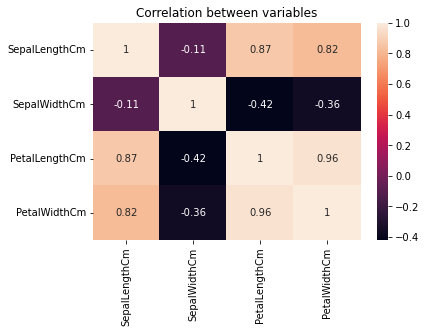

In [10]:
# Correlation between variables
ax = sns.heatmap(iris_df.corr(), annot=True).set(title='Correlation between variables')

# 3- Finding the optimum number of clusters

* Before clustering the data using kmeans, we need to specify the number of clusters. 
* In order to find the optimum number of clusters, there are various methods available like Silhouette Coefficient and the Elbow method. 
* Here, The Elbow Method is used.

### Brief about the Elbow method

In this method:
- The number of clusters are varies within a certain range. 
- For each number, within-cluster sum of square (wcss) value is calculated and stored in a list. 
- These value are then plotted against the range of number of clusters used before. 

In [11]:
# Calculating the within-cluster sum of square

within_cluster_sum_of_square = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_df)
    within_cluster_sum_of_square.append(km.inertia_)

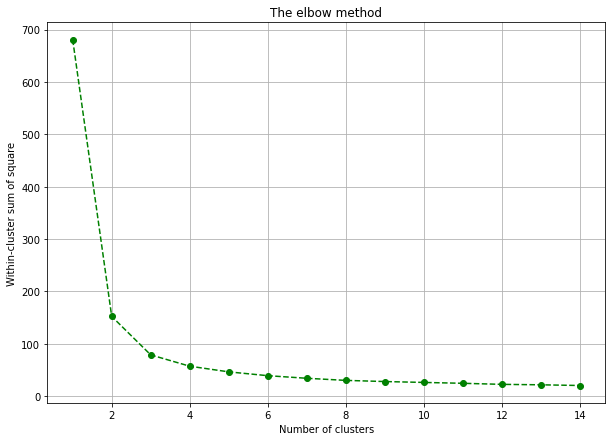

In [12]:
# Plotting the "within-cluster sum of square" against clusters range
plt.figure(figsize=(10,7))
plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

- We can clearly see why it is called 'The elbow method' 
- From the above graph, the optimum clusters is where the elbow occurs. 
- This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
- From this we choose the number of clusters as '3'.

# 4- Applying k means clustering on the data

In [13]:
from sklearn.cluster import KMeans

#Applying kmeans to the dataset / Creating the kmeans classifier
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# predicted values
predictions = model.fit_predict(iris_df)
predictions 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# 5- Visualising the clusters

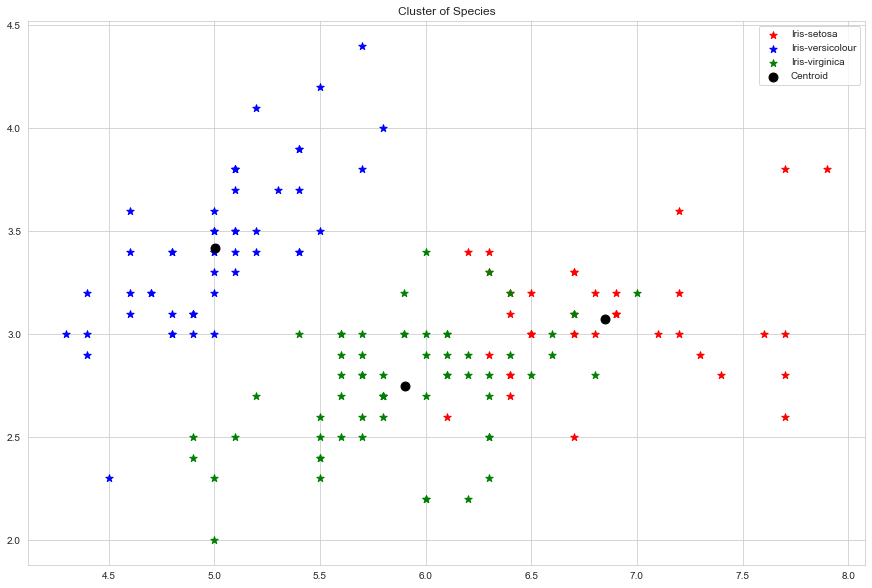

In [14]:
sns.set_style("whitegrid");
plt.figure(figsize=(15,10))

x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1],s=60,c='red', label = 'Iris-setosa',marker="*")
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1],s=60,c='blue', label = 'Iris-versicolour',marker="*")
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1],s=60,c='green', label = 'Iris-virginica',marker="*")

#Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s = 80, c = 'black', label='Centroid')
plt.title("Cluster of Species")
plt.legend()
plt.show()

In [15]:
# Thank you for watching :) 